In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [2]:
iris = load_iris()

df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
# Preprocessing
X = df.drop(columns=['species'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## K-Means Clustering
K-Means partitions the data into k clusters by minimizing the variance within each cluster.

It repeatedly assigns points to the nearest centroid and updates the centroid positions until convergence.

In [4]:
# Applying
kmeans = KMeans(n_clusters=3, random_state=42)
labels_kmeans = kmeans.fit_predict(X_scaled)

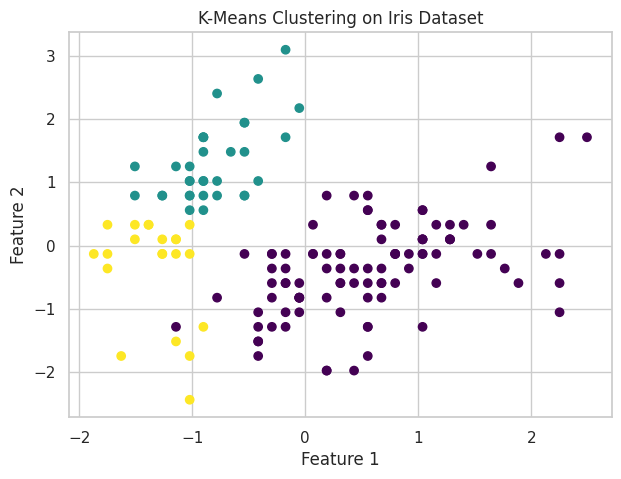

In [5]:
# Visualizing cluster
plt.figure(figsize=(7,5))
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=labels_kmeans, cmap='viridis')
plt.title("K-Means Clustering on Iris Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

## Hierarchical Clustering
Hierarchical clustering builds a hierarchy (tree) of clusters.
Agglomerative clustering starts with each point as its own cluster and merges the closest clusters step-by-step.

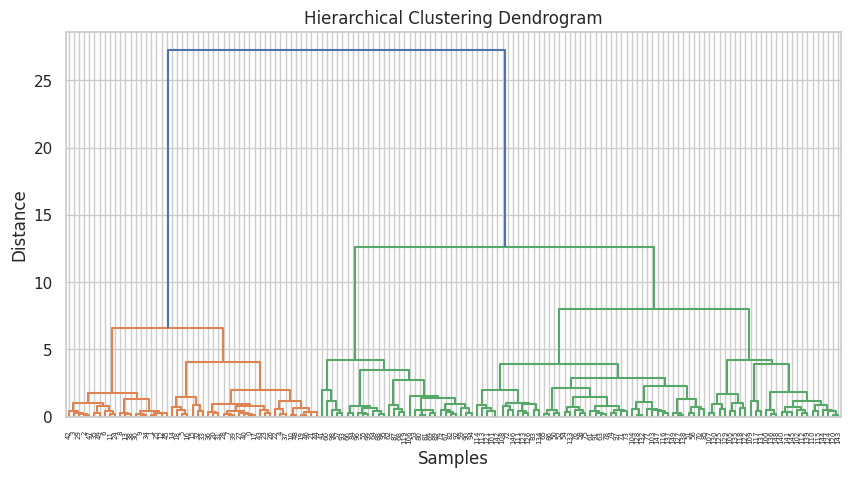

In [6]:
#Dendrogram
plt.figure(figsize=(10,5))
linkage_matrix = linkage(X_scaled, method='ward')
dendrogram(linkage_matrix)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

In [7]:
agg = AgglomerativeClustering(n_clusters=3)
labels_agg = agg.fit_predict(X_scaled)

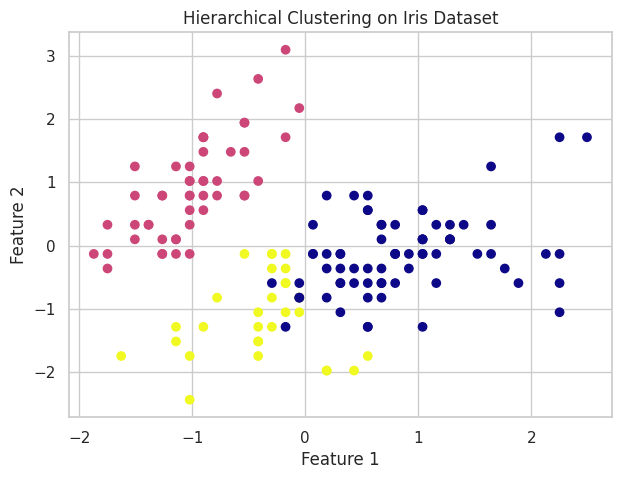

In [8]:
# Visualize Clusters
plt.figure(figsize=(7,5))
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=labels_agg, cmap='plasma')
plt.title("Hierarchical Clustering on Iris Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


### K-Means
- Fast and efficient
- Requires predefined number of clusters
- Performs well since Iris data is well separated

### Hierarchical
- Provides visual cluster structure
- Useful for understanding relationships
- Slightly slower but helps confirm cluster validity
